# Grain Boundary Grooving

Grain Boundaries are regions of fast diffusion.

**Initial Profile**

We are taking 2 grains seperated by vapour phase. A groove will be formed to be formed to balance the interfacial forces such that 

$\gamma _{GB}$ = $2\gamma _{SV}cos\theta$

where  $\theta$ = grain boundary grooving angle 
&
$_{SV}$ = Surface - Vapour Interface

**Phase Field Model**

- Step 1 : Order Paramters needed = 3. One conserved variable $c$, composition to differentiate between solid and vapour phases and two non-conserved variable $\phi_{1}$ and $\phi_{2}$ to differentiate between Grain 1 and Grain 2 repectively. 

They are defined as follows :

$c$ = 1 in solid | $c$ = 0 in vapour

$\phi_{1}$ = 1 or $\phi_{2}$ = 1 ; when c = 1 | $\phi_{1}$ = 0 and $\phi_{2}$ = 0 ; when c = 0 

- Step 2 : Defining the Free Energy Functional. 

$\mathscr F / N_{v}$ = $\int (f(c,\phi_{1},\phi_{2}) + k_{c}|\nabla c|^{2} + k_{\phi_{1}}|\nabla \phi_{1}|^{2} + k_{\phi_{2}}|\nabla \phi_{2}|^{2})dV$

where

$f(c,\phi_{1},\phi_{2})$ = $Ac^{2}(1-c)^{2} + Bc^{2}\xi(\phi_{1},\phi_{2}) + Z(1-c)^{2}(\phi_{1}^{2} + \phi_{2}^{2}) $

$\xi(\phi_{1},\phi_{2})$ = $\frac{\phi_{1}^{4}}{4} - \frac{\phi_{1}^{2}}{2} + \frac{\phi_{2}^{4}}{4} - \frac{\phi_{2}^{2}}{2} + 2\phi_{1}^{2}\phi_{2}^{2} + 0.25$

- Step 3 & 4 : Here we'll write one Cahn-Hilliard Equation and two Allen-Cahn Equations and solve them using fourier transform. 

In [1]:
# importing libraries
import numpy as np
from matplotlib import pyplot as plt,cm
from mpl_toolkits.mplot3d import Axes3D 
from scipy import fft 

%matplotlib inline

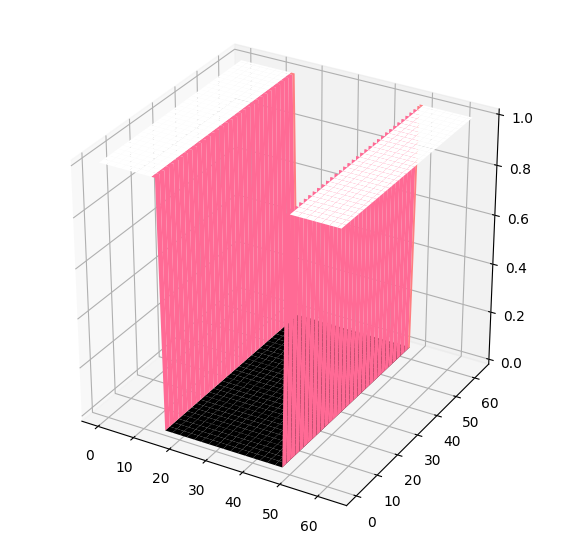

In [2]:
# defining xi function 
def Xi(e1,e2):
    y = (0.25 * (e1**4)) - (0.5 * (e1**2)) + (0.25 * (e2**4)) - (0.5 * (e2**2)) + (2 * (e1**2) * (e2**2)) + 0.25
    return y
# defining derivative of xi function
def Xip(e1,e2):
    y = (e1**3) - e1 + 4 * e1 * (e2**2)
    return y

# defining non-dimensionalized constants
kappac = 1.0
kappaphi1 = 1/3
kappaphi2 = 1/3
A = 1.0
B = 1.0
Z = 1.0
N = 64
dx = 1.0

# defining the 2D vectors
c = np.zeros((N,N)) # composition
phi1 = np.zeros((N,N)) #phi1
phi2 = np.zeros((N,N)) #phi2

# defining reciprocal space vectors
chat = np.zeros((N,N))
phi1hat = np.zeros((N,N))
phi2hat = np.zeros((N,N))

# setting up the intital microstructure 
for i in range (0,N) :
    for j in range (0,N) :
        if (j < int(N/4) or j > int(3*N/4)):
            
            c[i][j] = 1.0
            
            if (i < int(N/2)):
                phi1[i][j] = 1.0
            else:
                phi2[i][j] = 1.0
                
x = np.arange(0,N,1)
y = np.arange(0,N,1)

X, Y = np.meshgrid(x, y)
# plotting the initial microstructure
fig = plt.figure(figsize=(7,7), dpi=100)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, c[:],cmap=cm.gnuplot2) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


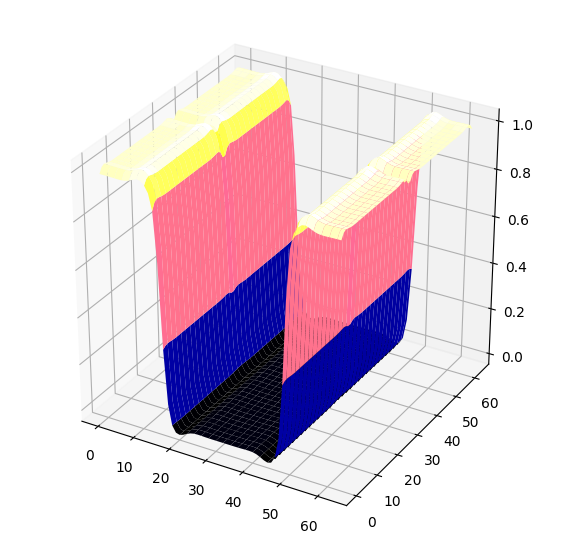

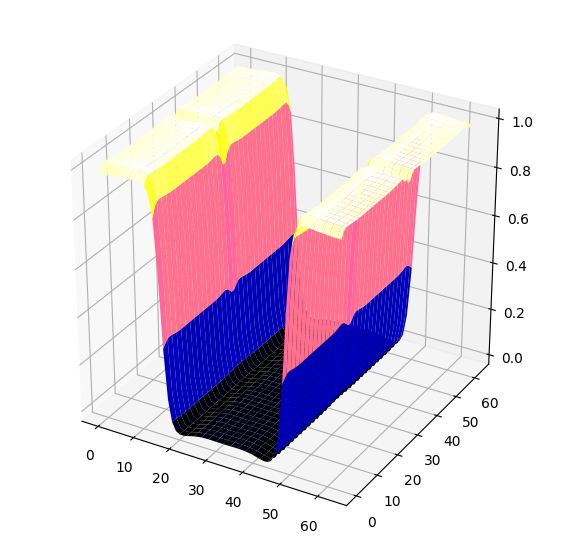

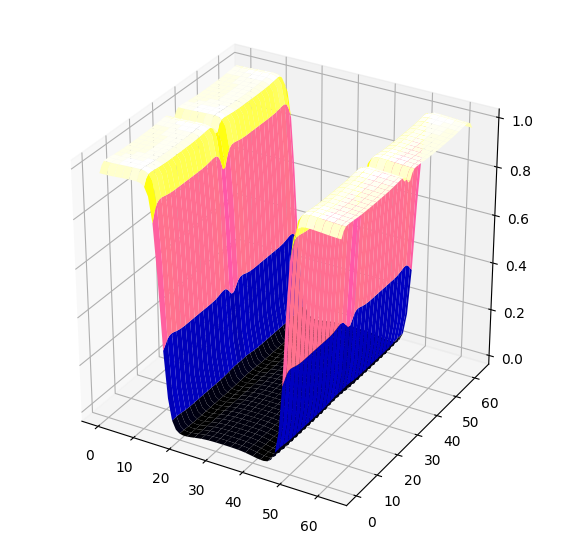

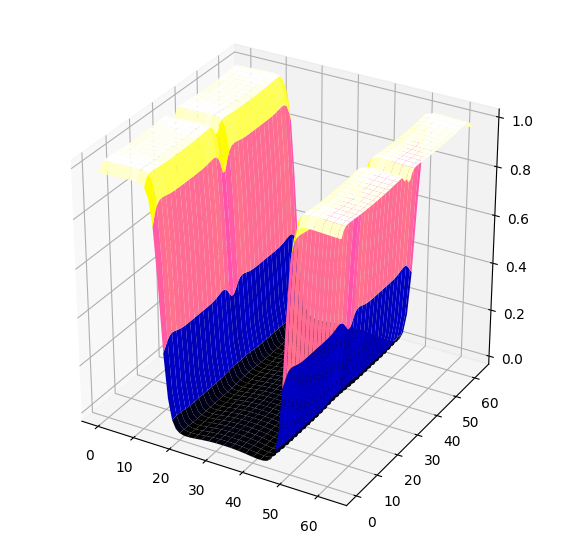

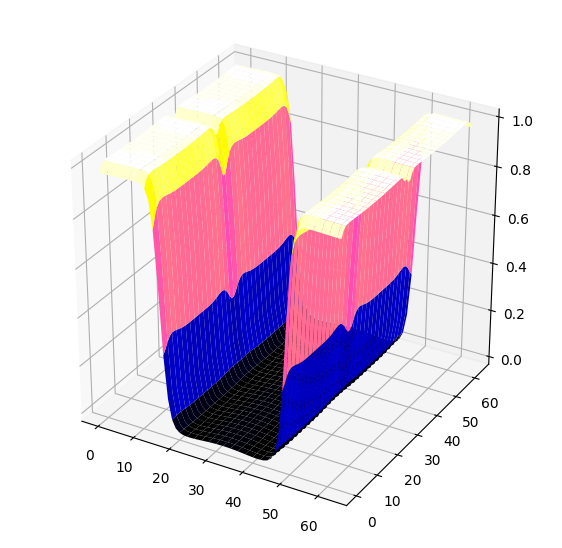

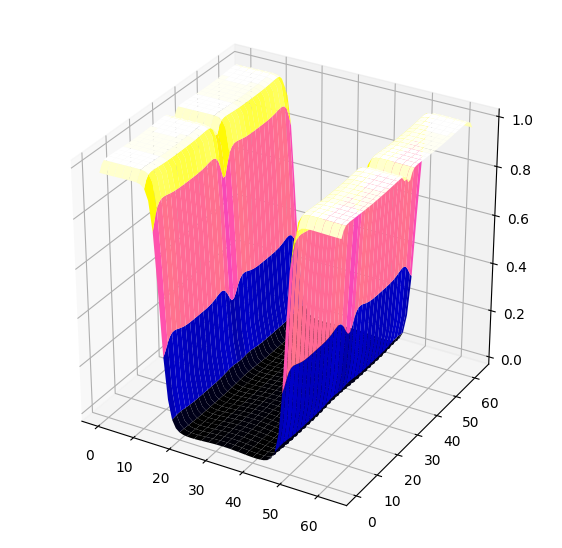

In [ ]:
halfN = N/2
delk = 2 * np.pi / N 
dt = 0.5 # time - step

# defining first derivative of f0 function vectors
gc = np.zeros((N,N))
gphi1 = np.zeros((N,N))
gphi2 = np.zeros((N,N))

# defining reciprocal space vectors of first derivative of f0 function 
gchat = np.zeros((N,N))
gphi1hat = np.zeros((N,N))
gphi2hat = np.zeros((N,N))


for n in range(0,40): # outer-time loop
    for m in range(0,2): # inner-time loop
        
        # evolving the first derivative of f0 function
        for j in range (0,N) :
            for k in range (0,N) :
                
                # with respect to c
                gc[j][k] = 2 * A * c[j][k] * (1 - c[j][k]) * (1 - 2*c[j][k]) + \
                           2 * B * c[j][k] * Xi(phi1[j][k], phi2[j][k]) - \
                            2 * Z * (1 - c[j][k]) * ((phi1[j][k]** 2) + (phi2[j][k]** 2))
                
                # with respect to phi1
                gphi1[j][k] = B * (c[j][k]**2) * Xip(phi1[j][k], phi2[j][k]) + \
                                2 * Z * ((1 - c[j][k])**2) * phi1[j][k]
                # with respect to phi2
                gphi2[j][k] = B * c[j][k]**2 * Xip(phi2[j][k], phi1[j][k]) + \
                                2 * Z * (1 - c[j][k])**2 * phi2[j][k]
        # taking fourier transforms
        gchat = fft.fft2(gc)
        gphi1hat = fft.fft2(gphi1)
        gphi2hat = fft.fft2(gphi2)
        
        chat = fft.fft2(c)
        phi1hat = fft.fft2(phi1)
        phi2hat = fft.fft2(phi2)
    
        for i in range (0,N) :
            for j in range(0,N) :
                # implementing the PBCs in both axis
                if (i <= halfN):
                    kx = i * delk 
                if (i > halfN) :
                    kx = (i-N) * delk
                if (j <= halfN):
                    ky = j * delk 
                if (j > halfN) :
                    ky = (j-N) * delk
                
                k2 = kx*kx + ky*ky 
                k4 = k2 ** 2
                # evolving the 3 phase field equations  
                chat[i][j] = (chat[i][j] - dt * k2 * gchat[i][j]) / (1 + 2 * kappac * k4 * dt) # CH
                phi1hat[i][j] = (phi1hat[i][j] - dt * gphi1hat[i][j]) / (1 + 2 * kappaphi1 * k2 * dt) # AC 1
                phi2hat[i][j] = (phi2hat[i][j] - dt * gphi2hat[i][j]) / (1 + 2 * kappaphi2 * k2 * dt) # AC 2
        # taking inverse fourier transformation        
        c = np.real(fft.ifft2(chat))
        phi1 = np.real(fft.ifft2(phi1hat))
        phi2 = np.real(fft.ifft2(phi2hat))
    # plotting the evolving microstructure
    fig = plt.figure(figsize=(7,7), dpi=100)
    ax = fig.gca(projection='3d')
    surf2 = ax.plot_surface(X, Y, c[:], cmap=cm.gnuplot2)